# Quick start guide to optimization

In this example, we perform the optimization of the Rosenbrock test function. 

Let $a, b\in\mathbb{R}$ be parameters. The Rosenbrock function is defined by

$$
f(x_1, x_2) = (a-x_1)^2 + b(x_2 - x_1^2)^2
$$

for any $\mathbf{x}\in\mathbb{R}^2$. 
This function is often used with $a=1$ and $b=100$. In this case, the function has a single global minimum at:

$$
\mathbf{x}^\star = (1, 1)^T.
$$

This function has a nonlinear least squares structure. 

*References*
* Rosenbrock, H.H. (1960). "An automatic method for finding the greatest or least value of a function". The Computer Journal. 3 (3): 175–184.

## Definition of the function

In [1]:
import openturns as ot

In [2]:
rosenbrock = ot.SymbolicFunction(['x1', 'x2'], 
                                 ['(1-x1)^2+100*(x2-x1^2)^2'])

In [3]:
x0 = ot.Point([-1.0, 1.0])

In [4]:
xexact = ot.Point([1.0, 1.0])

In [5]:
lowerbound = [-2.0, -2.0]
upperbound = [2.0, 2.0]

## Plot the iso-values of the objective function

In [6]:
rosenbrock = ot.MemoizeFunction(rosenbrock)

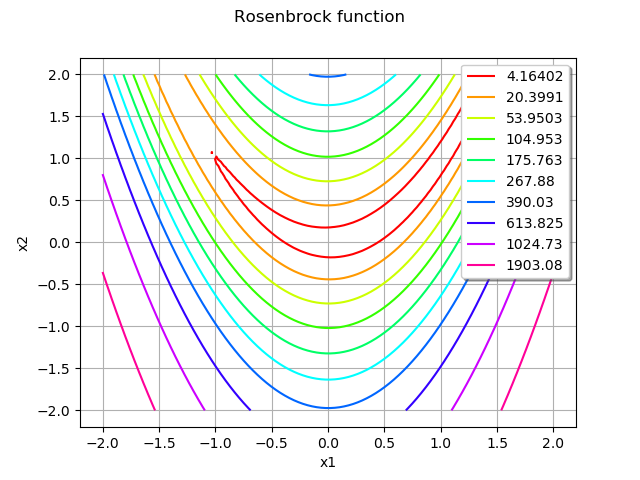

In [7]:
graph = rosenbrock.draw(lowerbound, upperbound, [100]*2)
graph.setTitle("Rosenbrock function")
graph

We see that the minimum is on the top right of the picture and the starting point is on the top left of the picture. Since the function has a long valley following the curve $x_2 - x^2=0$, the algorithm generally have to follow the bottom of the valley. 

## Create and solve the optimization problem

In [8]:
problem = ot.OptimizationProblem(rosenbrock)

In [9]:
algo = ot.Cobyla(problem)
algo.setMaximumRelativeError(1.e-1) # on x
algo.setMaximumEvaluationNumber(50000)
algo.setStartingPoint(x0)
algo.run()

In [10]:
result = algo.getResult()

In [11]:
xoptim = result.getOptimalPoint()
xoptim

class=Point name=Unnamed dimension=2 values=[0.99251,0.985022]

In [12]:
delta = xexact - xoptim
absoluteError = delta.norm()
absoluteError

0.016745946097259285

We see that the algorithm found an accurate approximation of the solution. 

In [13]:
result.getOptimalValue() # f(x*)

class=Point name=Unnamed dimension=1 values=[5.6392e-05]

In [14]:
result.getEvaluationNumber()

10520

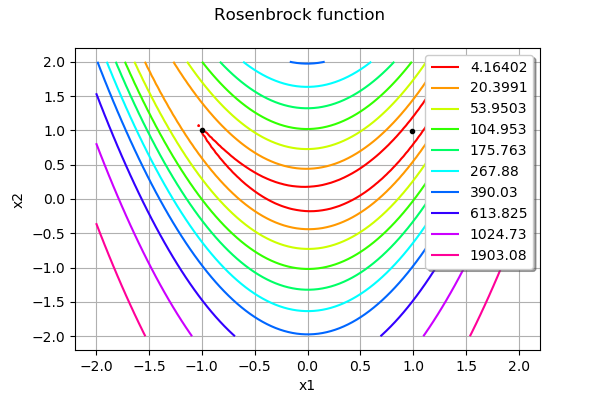

In [15]:
graph = rosenbrock.draw(lowerbound, upperbound, [100]*2)
cloud = ot.Cloud(ot.Sample([x0, xoptim]))
cloud.setColor("black")
cloud.setPointStyle("bullet")
graph.add(cloud)
graph.setTitle("Rosenbrock function")
graph

We see that the algorithm had to start from the top left of the banana and go to the top right.

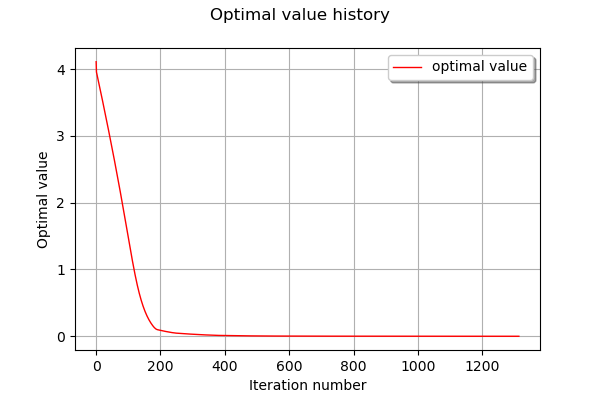

In [16]:
result.drawOptimalValueHistory()

The function value history make the path of the algorithm clear. In the first step, the algorithm went in the valley, which made the function value decrease rapidly. Once there, the algorithm had to follow the bottom of the valley so that the function decreased but slowly. In the final steps, the algorithm found the neighbourhood of the minimum so that the local convergence could take place. 

In order to see where the function was evaluated, we use the `getInputSample` method. 

In [17]:
inputSample = result.getInputSample()

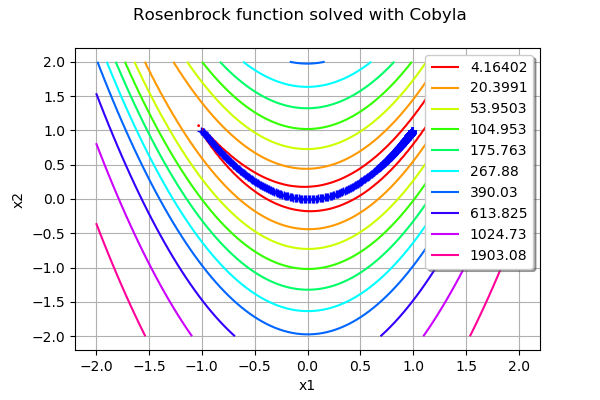

In [18]:
graph = rosenbrock.draw(lowerbound, upperbound, [100]*2)
graph.setTitle("Rosenbrock function solved with Cobyla")
cloud = ot.Cloud(inputSample)
graph.add(cloud)
graph

We see that the algorithm made lots of evaluations in the bottom of the valley before getting in the neighbourhood of the minimum. 

## Solving the problem with NLOPT

We see that the `Cobyla` algorithm required lots of function evaluations. This is why we now use the `NLopt` class with the LBFGS algorithm. However, the algorithm may use input points which are far away from the input domain we used so far. This is why we had bounds to the problem, so that the algorithm never goes to far away from the valley. 

In [19]:
bounds = ot.Interval(lowerbound, upperbound)

In [20]:
problem = ot.OptimizationProblem(rosenbrock)
problem.setBounds(bounds)

In [21]:
algo = ot.NLopt(problem, 'LD_LBFGS') 
algo.setStartingPoint(x0)
algo.run()

In [22]:
result = algo.getResult()

In [23]:
xoptim = result.getOptimalPoint()
xoptim

class=Point name=Unnamed dimension=2 values=[1,1]

In [24]:
delta = xexact - xoptim
absoluteError = delta.norm()
absoluteError

7.740583643426769e-12

We see that the algorithm found an extremely accurate approximation of the solution. 

In [25]:
result.getOptimalValue() # f(x*)

class=Point name=Unnamed dimension=1 values=[1.77616e-23]

In [26]:
result.getEvaluationNumber()

44

This number of iterations is much less than the previous experiment. 

In [27]:
inputSample = result.getInputSample()

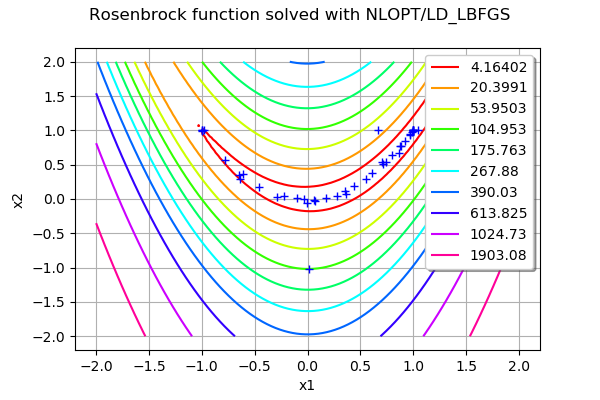

In [28]:
graph = rosenbrock.draw(lowerbound, upperbound, [100]*2)
graph.setTitle("Rosenbrock function solved with NLOPT/LD_LBFGS")
cloud = ot.Cloud(inputSample)
graph.add(cloud)
graph